In [26]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import matplotlib as mpl
from tqdm import tqdm
from sklearn.model_selection import train_test_split

In [28]:
image_path = []

for root,dirs,files in os.walk("/Users/bilal/Desktop/python/flood-detection/archive/Image"):
    for file in sorted(files):
        path = os.path.join(root,file)
        image_path.append(path)


len(image_path)


290

In [30]:
mask_path = []

for root,dirs,files in os.walk('/Users/bilal/Desktop/python/flood-detection/archive/Mask'):
    for file in sorted(files):
        path = os.path.join(root,file)
        mask_path.append(path)

len(mask_path)

290

In [32]:
path.split('/')[-1].strip('.png')

'9'

In [38]:
images = []
error_files = []
for path in tqdm(image_path):
    try:
        img = tf.io.read_file(path)
        img = tf.image.decode_image(img, channels=3, dtype=tf.uint8)
        images.append(img)
    except tf.errors.InvalidArgumentError as e:
        print(f"Error decoding image : {path}")
        error_files.append(path.split('/')[-1].strip('.jpg'))
        continue
        

  5%|▌         | 15/290 [00:00<00:04, 68.50it/s]

Error decoding image : /Users/bilal/Desktop/python/flood-detection/archive/Image/1002.jpg
Error decoding image : /Users/bilal/Desktop/python/flood-detection/archive/Image/1009.jpg
Error decoding image : /Users/bilal/Desktop/python/flood-detection/archive/Image/1013.jpg
Error decoding image : /Users/bilal/Desktop/python/flood-detection/archive/Image/1015.jpg


 16%|█▌        | 45/290 [00:00<00:03, 67.34it/s]

Error decoding image : /Users/bilal/Desktop/python/flood-detection/archive/Image/1027.jpg
Error decoding image : /Users/bilal/Desktop/python/flood-detection/archive/Image/1028.jpg
Error decoding image : /Users/bilal/Desktop/python/flood-detection/archive/Image/1036.jpg
Error decoding image : /Users/bilal/Desktop/python/flood-detection/archive/Image/1037.jpg
Error decoding image : /Users/bilal/Desktop/python/flood-detection/archive/Image/1046.jpg
Error decoding image : /Users/bilal/Desktop/python/flood-detection/archive/Image/1049.jpg
Error decoding image : /Users/bilal/Desktop/python/flood-detection/archive/Image/1054.jpg


 26%|██▌       | 75/290 [00:00<00:02, 105.32it/s]

Error decoding image : /Users/bilal/Desktop/python/flood-detection/archive/Image/1056.jpg
Error decoding image : /Users/bilal/Desktop/python/flood-detection/archive/Image/1062.jpg
Error decoding image : /Users/bilal/Desktop/python/flood-detection/archive/Image/1068.jpg
Error decoding image : /Users/bilal/Desktop/python/flood-detection/archive/Image/1074.jpg
Error decoding image : /Users/bilal/Desktop/python/flood-detection/archive/Image/1077.jpg
Error decoding image : /Users/bilal/Desktop/python/flood-detection/archive/Image/1078.jpg
Error decoding image : /Users/bilal/Desktop/python/flood-detection/archive/Image/1082.jpg


 40%|███▉      | 115/290 [00:01<00:02, 71.81it/s]

Error decoding image : /Users/bilal/Desktop/python/flood-detection/archive/Image/19.jpg


 58%|█████▊    | 169/290 [00:02<00:01, 74.86it/s]

Error decoding image : /Users/bilal/Desktop/python/flood-detection/archive/Image/22.jpg
Error decoding image : /Users/bilal/Desktop/python/flood-detection/archive/Image/28.jpg
Error decoding image : /Users/bilal/Desktop/python/flood-detection/archive/Image/30.jpg


 65%|██████▍   | 188/290 [00:02<00:01, 71.97it/s]

Error decoding image : /Users/bilal/Desktop/python/flood-detection/archive/Image/3008.jpg
Error decoding image : /Users/bilal/Desktop/python/flood-detection/archive/Image/3019.jpg
Error decoding image : /Users/bilal/Desktop/python/flood-detection/archive/Image/3023.jpg
Error decoding image : /Users/bilal/Desktop/python/flood-detection/archive/Image/3025.jpg


 75%|███████▍  | 217/290 [00:03<00:00, 98.05it/s]

Error decoding image : /Users/bilal/Desktop/python/flood-detection/archive/Image/3042.jpg
Error decoding image : /Users/bilal/Desktop/python/flood-detection/archive/Image/3046.jpg
Error decoding image : /Users/bilal/Desktop/python/flood-detection/archive/Image/3047.jpg
Error decoding image : /Users/bilal/Desktop/python/flood-detection/archive/Image/3052.jpg
Error decoding image : /Users/bilal/Desktop/python/flood-detection/archive/Image/3054.jpg
Error decoding image : /Users/bilal/Desktop/python/flood-detection/archive/Image/3059.jpg


 82%|████████▏ | 238/290 [00:03<00:00, 71.23it/s]

Error decoding image : /Users/bilal/Desktop/python/flood-detection/archive/Image/3063.jpg
Error decoding image : /Users/bilal/Desktop/python/flood-detection/archive/Image/3072.jpg


 89%|████████▉ | 258/290 [00:03<00:00, 58.44it/s]

Error decoding image : /Users/bilal/Desktop/python/flood-detection/archive/Image/3080.jpg
Error decoding image : /Users/bilal/Desktop/python/flood-detection/archive/Image/3086.jpg
Error decoding image : /Users/bilal/Desktop/python/flood-detection/archive/Image/3088.jpg
Error decoding image : /Users/bilal/Desktop/python/flood-detection/archive/Image/3097.jpg


 96%|█████████▌| 279/290 [00:04<00:00, 62.18it/s]

Error decoding image : /Users/bilal/Desktop/python/flood-detection/archive/Image/36.jpg
Error decoding image : /Users/bilal/Desktop/python/flood-detection/archive/Image/41.jpg


100%|██████████| 290/290 [00:04<00:00, 66.00it/s]

Error decoding image : /Users/bilal/Desktop/python/flood-detection/archive/Image/9.jpg


In [40]:
len(error_files)

41

In [42]:
masks = []

for path in tqdm(mask_path):
    try:
        if(path.split('/')[-1].strip('.png') in error_files):
            continue
        msk = tf.io.read_file(path)
        msk = tf.image.decode_image(msk, channels=1, dtype=tf.uint8)
        masks.append(msk)
    except tf.errors.InvalidArgumentError as e:
        print(f"Error decoding image : {path}")
        continue

100%|██████████| 290/290 [00:01<00:00, 165.35it/s]


In [44]:
len(images)


249

In [46]:
test_images = images[220: ]
test_masks = masks[220: ]

(-0.5, 1999.5, 1332.5, -0.5)

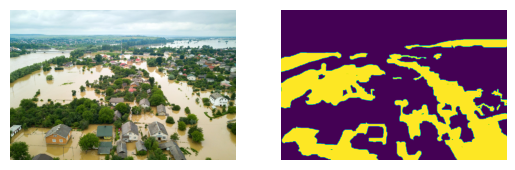

In [48]:
plt.subplot(1,2,1)
plt.imshow(test_images[0])
plt.axis(False)
plt.subplot(1,2,2)
plt.imshow(test_masks[0])
plt.axis(False)

In [52]:
images = images[:220]
masks = masks[:220]

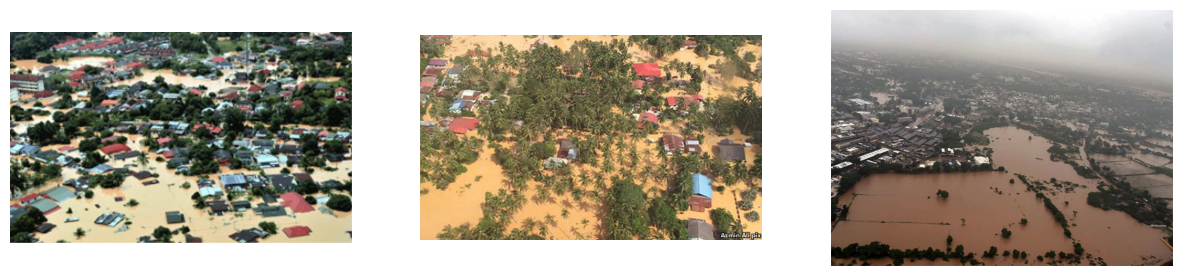

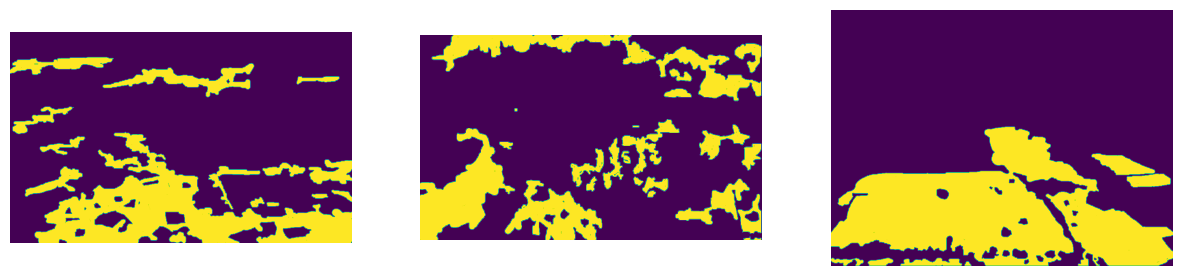

In [54]:
plt.figure(figsize = (15,6))

for i in range(3):
    plt.subplot(1,3,i+1)
    plt.imshow(np.squeeze(images[i]))
    plt.axis(False)
    
plt.figure(figsize = (15,6))

for i in range(3):
    plt.subplot(1,3,i+1)
    plt.imshow(masks[i])
    plt.axis(False)

In [56]:
def resize_image(image):
    image = np.squeeze(image)
    image = tf.cast(image, dtype = tf.float32)
    image = image/255.
    image = tf.image.resize(image, (128,128))
    return image

In [58]:
def resize_mask(mask):
    mask = tf.cast(mask, dtype = tf.float32)
    mask = mask/255.
    mask = tf.image.resize(mask, (128,128))
    return mask

In [60]:
X = [resize_image(i) for i in images] 
y = [resize_mask(i) for i in masks] 

In [62]:
len(X), len(y)


(220, 220)

In [64]:
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size = 0.2, random_state=0)

print('X_train: ', len(X_train))
print('X_val: ', len(X_val))
print('y_train: ', len(y_train))
print('y_val: ', len(y_val))

X_train:  176
X_val:  44
y_train:  176
y_val:  44


In [70]:
X_train = tf.data.Dataset.from_tensor_slices(X_train)
X_val = tf.data.Dataset.from_tensor_slices(X_val)
y_train = tf.data.Dataset.from_tensor_slices(y_train)
y_val = tf.data.Dataset.from_tensor_slices(y_val)

In [72]:
X_train.element_spec, X_val.element_spec, y_train.element_spec, y_val.element_spec


(TensorSpec(shape=(128, 128, 3), dtype=tf.float32, name=None),
 TensorSpec(shape=(128, 128, 3), dtype=tf.float32, name=None),
 TensorSpec(shape=(128, 128, 1), dtype=tf.float32, name=None),
 TensorSpec(shape=(128, 128, 1), dtype=tf.float32, name=None))

In [74]:
train = tf.data.Dataset.zip(X_train, y_train)
val = tf.data.Dataset.zip(X_val, y_val)

In [76]:
type(train)


tensorflow.python.data.ops.zip_op._ZipDataset

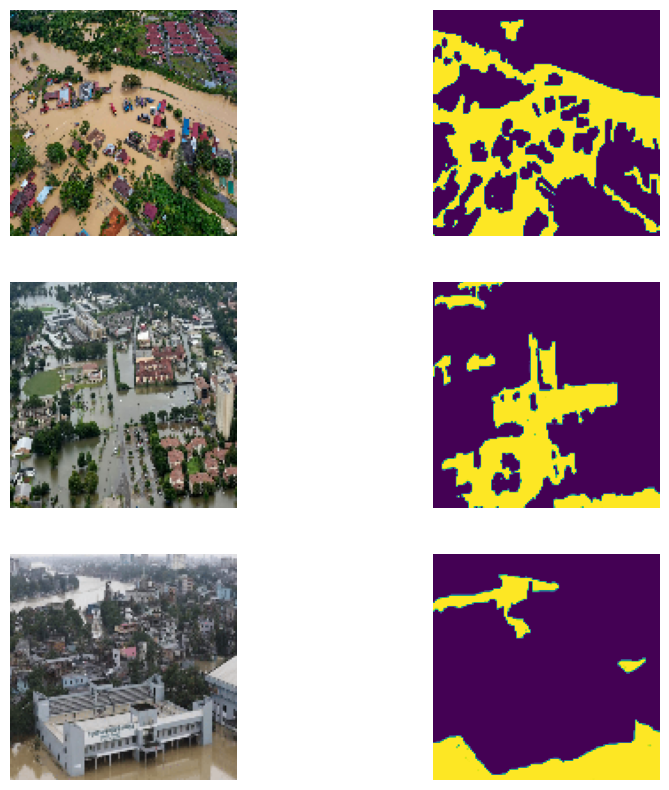

In [78]:
i = 0
plt.figure(figsize=(10,10))
for img, mask in train.take(3):
    plt.subplot(3,2,i+1)
    plt.imshow(img)
    i+=1
    plt.axis(False)
    
    plt.subplot(3,2,i+1)
    plt.imshow(mask)
    i+=1
    plt.axis(False)

In [80]:
size = tf.data.experimental.cardinality(train)
size.numpy()

176

In [82]:
sample = list(train.as_numpy_iterator())
img = []
msk = []
for i,j in sample:
    img.append(i)
    msk.append(j)

In [84]:
img = np.array(img)


In [86]:
msk = np.array(msk)


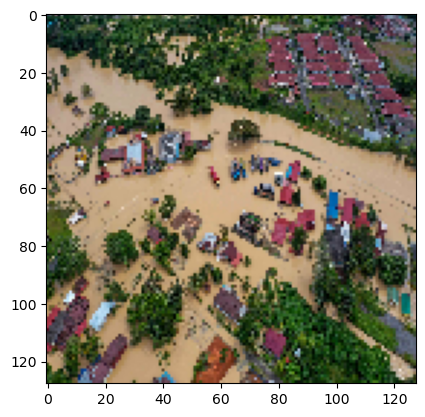

In [88]:
plt.imshow(img[0])


In [90]:
sample = list(val.as_numpy_iterator())
val_img = []
val_msk = []
for i,j in sample:
    val_img.append(i)
    val_msk.append(j)

In [92]:
val_img = np.array(val_img)
val_img.shape

(44, 128, 128, 3)

In [94]:
val_msk = np.array(val_msk)
val_msk.shape

(44, 128, 128, 1)

In [96]:
from keras.models import Model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import concatenate, Conv2D, MaxPooling2D, Conv2DTranspose
from keras.layers import Input,UpSampling2D,BatchNormalization
from tensorflow.keras.optimizers import Adam
from keras import backend as keras

In [98]:
def unet(input_size = (128,128,3)):
    inputs = Input(input_size)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(inputs)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool1)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3)
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv4)
    drop4 = Dropout(0.5)(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)

    conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool4)
    conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv5)
    drop5 = Dropout(0.5)(conv5)

    up6 = Conv2DTranspose(512,2,strides=(2,2),padding='same')(drop5)
    merge6 = concatenate([drop4,up6], axis = 3)
    conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge6)
    conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv6)

    up7 = Conv2DTranspose(256,2,strides=(2,2),padding='same')(conv6)
    merge7 = concatenate([conv3,up7], axis = 3)
    conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge7)
    conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv7)

    up8 = Conv2DTranspose(128,2,strides=(2,2),padding='same')(conv7)
    merge8 = concatenate([conv2,up8], axis = 3)
    conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge8)
    conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv8)

    up9 = Conv2DTranspose(64,2,strides=(2,2),padding='same')(conv8)
    merge9 = concatenate([conv1,up9], axis = 3)
    conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge9)
    conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)

    conv9 = Conv2D(2, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv10 = Conv2D(1, 1, activation = 'sigmoid')(conv9)

    model = Model(inputs, conv10)

    model.compile(optimizer = Adam(learning_rate=1e-4), loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [100]:
model = unet()  


In [102]:
model.fit(img,
          msk,
          batch_size = 16,
          epochs=30,
          validation_data=(val_img,val_msk))

Epoch 1/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 139s 12s/step - accuracy: 0.3871 - loss: 0.7201 - val_accuracy: 0.4818 - val_loss: 0.6923
Epoch 2/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 132s 12s/step - accuracy: 0.4911 - loss: 0.6935 - val_accuracy: 0.6397 - val_loss: 0.6923
Epoch 3/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 132s 12s/step - accuracy: 0.6174 - loss: 0.6924 - val_accuracy: 0.6546 - val_loss: 0.6906
Epoch 4/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 132s 12s/step - accuracy: 0.6456 - loss: 0.6915 - val_accuracy: 0.7008 - val_loss: 0.6879
Epoch 5/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 131s 12s/step - accuracy: 0.6693 - loss: 0.6893 - val_accuracy: 0.6528 - val_loss: 0.6793
Epoch 6/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 131s 12s/step - accuracy: 0.6758 - loss: 0.6826 - val_accuracy: 0.6598 - val_loss: 0.6640
Epoch 7/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 132s 12s/step - accuracy: 0.7162 - loss: 0.6709 - val_accuracy: 0.6498 - val_loss: 0.6430
Epoch 8/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 135s 12s/step - accuracy: 0.7107 - loss: 0.6548 - val_accuracy: 0.

In [104]:
train_loss ,train_acc = model.evaluate(img,msk)
val_loss ,val_acc = model.evaluate(val_img,val_msk)
print("Training loss = %.2f" % train_loss)
print("Training accuracy = %.2f "% train_acc)

print("Validation loss = %.2f "%val_loss)
print("Validation accuracy = %.2f "% val_acc)

6/6 ━━━━━━━━━━━━━━━━━━━━ 37s 6s/step - accuracy: 0.8393 - loss: 0.5592
2/2 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.8202 - loss: 0.5279
Training loss = 0.56
Training accuracy = 0.84 
Validation loss = 0.53 
Validation accuracy = 0.82 


In [106]:
test_img = [resize_image(i) for i in test_images]
test_img = np.array(test_img)
test_img.shape

(29, 128, 128, 3)

In [108]:
test_msk = [resize_mask(i) for i in test_masks]
test_msk = np.array(test_msk)
test_msk.shape

(29, 128, 128, 1)

In [110]:
y_pred = model.predict(test_img)


1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


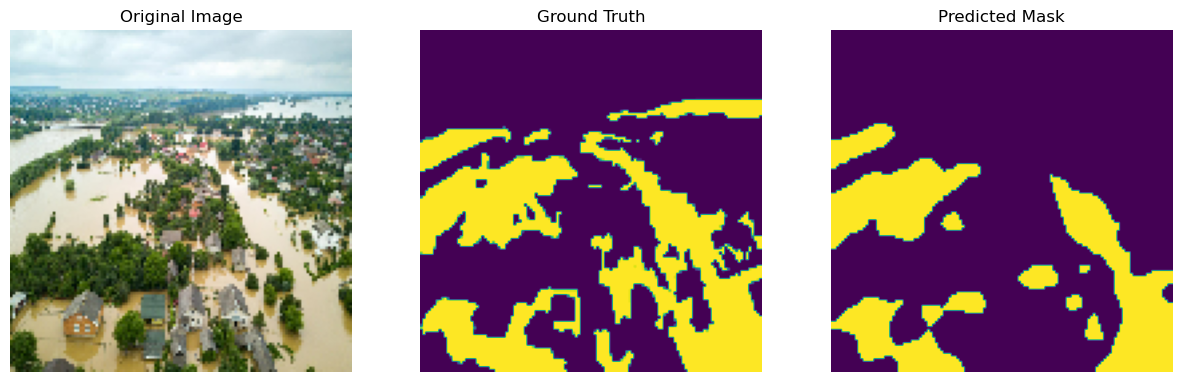

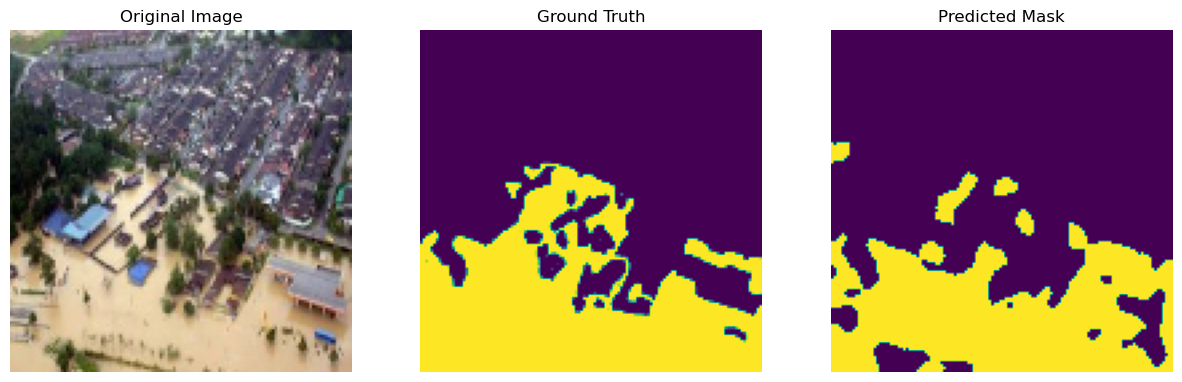

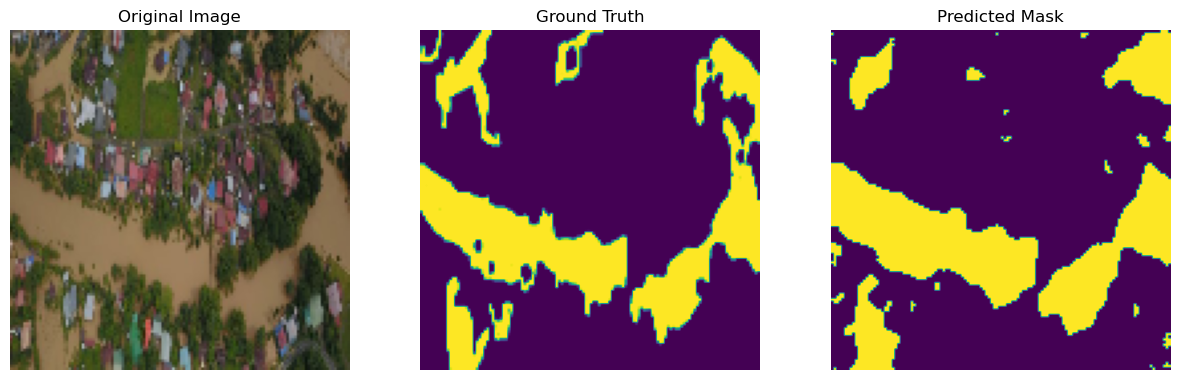

In [112]:
for i in range(3):

    plt.figure(figsize=(15,15))
    
    plt.subplot(i+1,3,1)
    plt.title("Original Image")
    plt.imshow(test_img[i])
    plt.axis(False)
    
    plt.subplot(i+1,3,2)
    plt.title("Ground Truth")
    plt.imshow(test_msk[i])
    plt.axis(False)
    
    plt.subplot(i+1,3,3)
    plt.title("Predicted Mask")
    plt.imshow(tf.round(y_pred[i]))
    plt.axis(False)